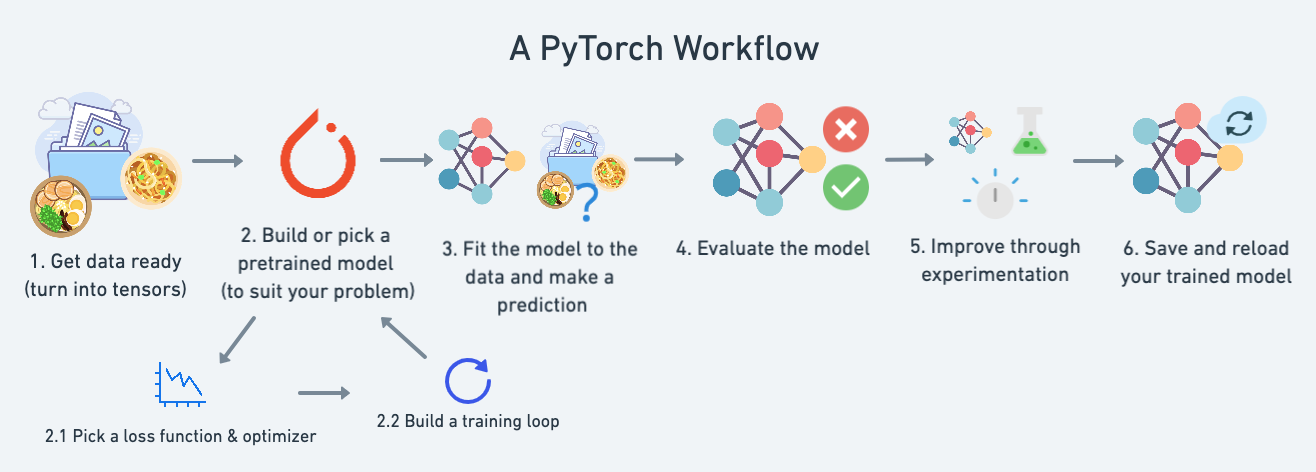

In [1]:
import torch
from torch import nn


In [2]:
torch.__version__

'1.13.1'

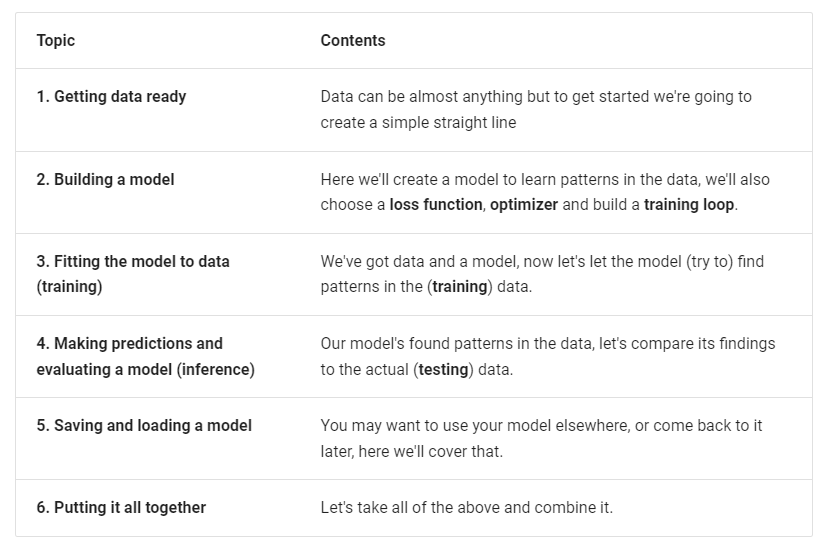

In [3]:
# Linear Regression

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X[:10] = {X[:10]}")
print(f"y[:10] = {y[:10]}")

X[:10] = tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
y[:10] = tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [4]:
len(X), len(y)

(50, 50)

In [20]:
X.shape

torch.Size([50, 1])

In [21]:
y.shape

torch.Size([50, 1])

In [5]:
# Split data into training and test set
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test)

(40, 10)

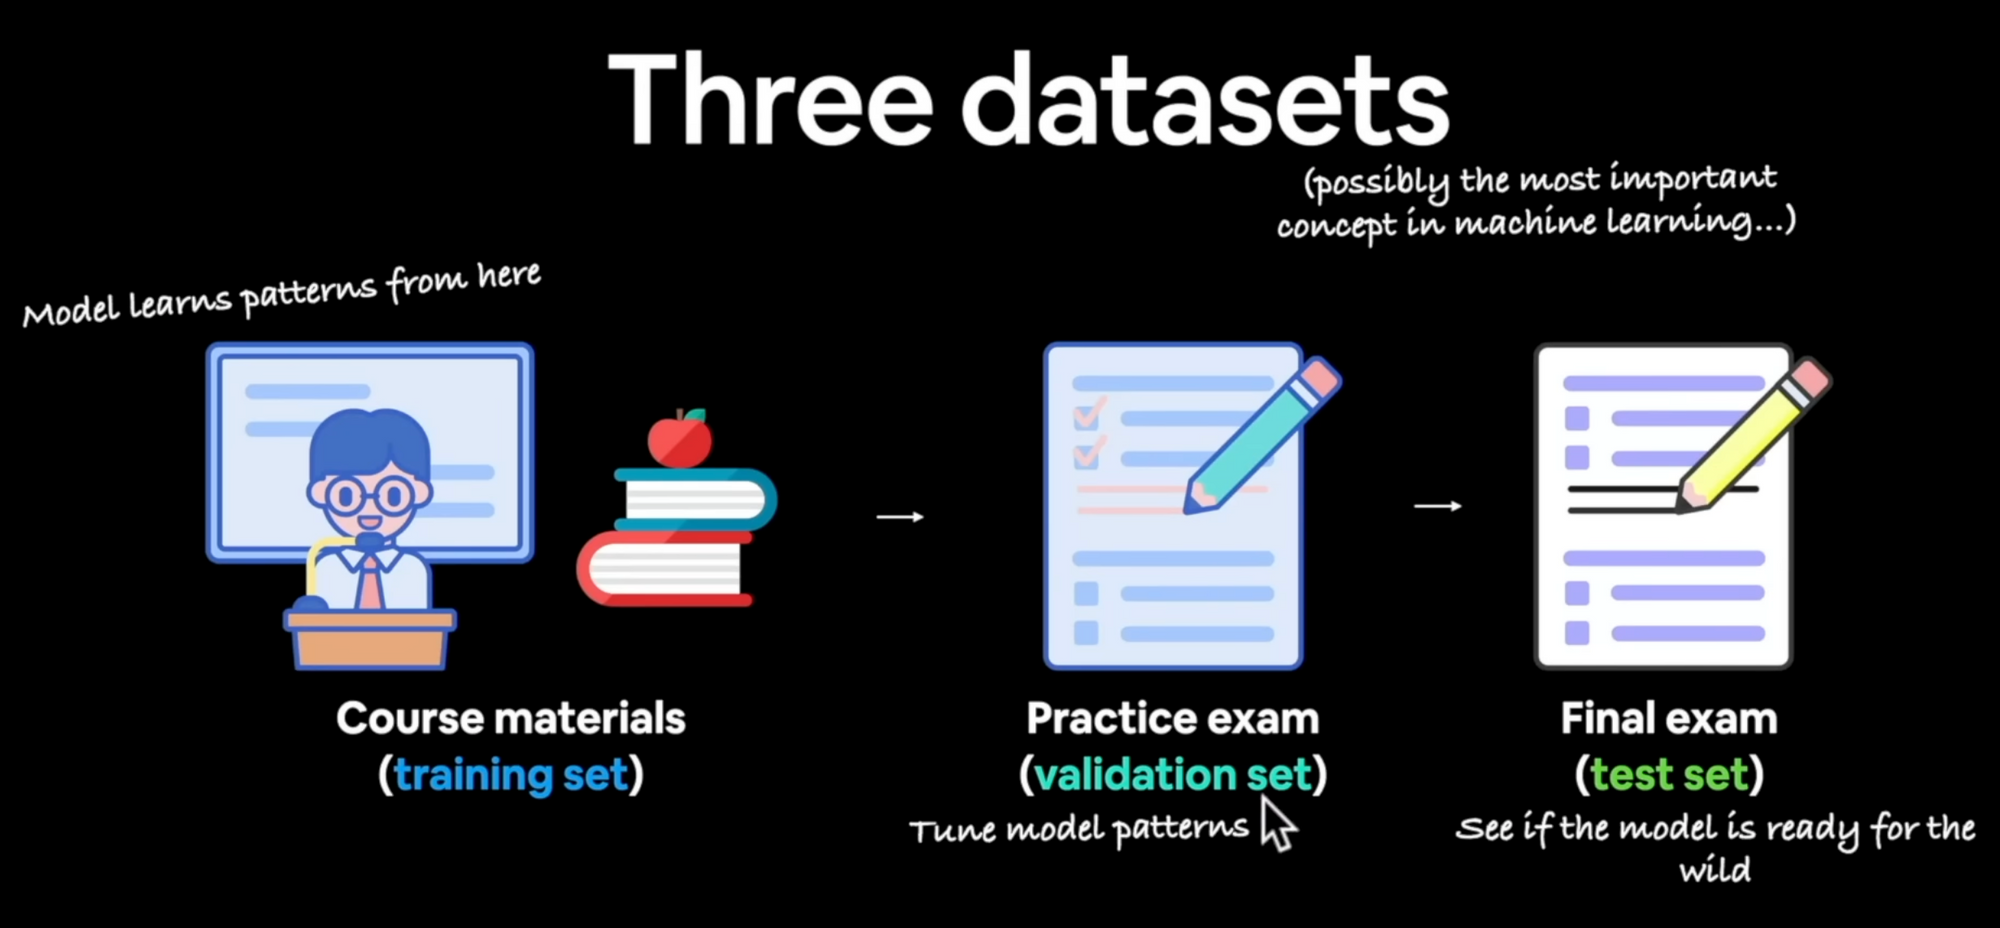

Visualize

In [6]:
import matplotlib.pyplot as plt

In [18]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    plot training data, test data and compare predictions
    """
    plt.figure(figsize=(10, 7))

    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

    # plot predictions
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})
        

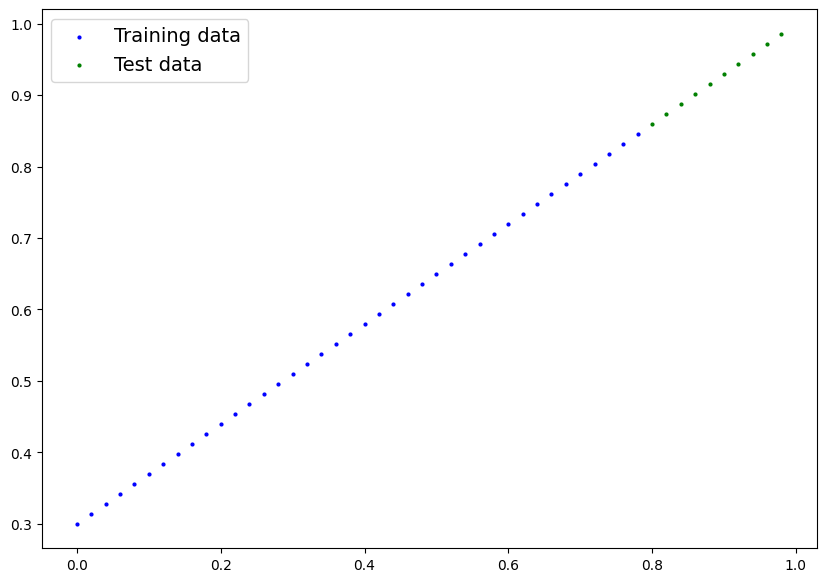

In [19]:
plot_predictions()

== Build a PyTorch model ==

In [25]:
from torch import nn

In [57]:
# Create linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1),
                                    requires_grad = True)
        self.bias = nn.Parameter(torch.randn(1),
                                 requires_grad = True)
        
    # Forward method to difine the computation of our model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias    # Linear regression
    

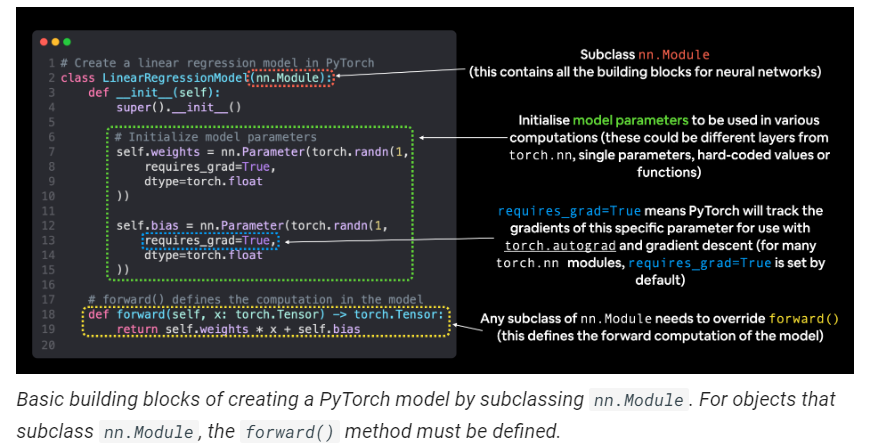

In [ ]:
# Check the contents of our model

In [58]:
# Note that when initialize, our weights and bias are random assigned
torch.manual_seed(888)

# create the instance
model_0 = LinearRegressionModel()

In [46]:
model_0.parameters()

<generator object Module.parameters at 0x0000010989DC4F90>

In [47]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.2039], requires_grad=True),
 Parameter containing:
 tensor([0.1912], requires_grad=True)]

In [51]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.2039])), ('bias', tensor([0.1912]))])

In [53]:
# our goal is to train our model to make the initialized parameters closer and closer to the real hard-coded values
weight, bias

(0.7, 0.3)

In [54]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [55]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [59]:
# Make prediction using "torch.inderence_mode()" 
# this will turn off auto_grad tracking to save computation

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[ 0.0281],
        [ 0.0240],
        [ 0.0199],
        [ 0.0158],
        [ 0.0117],
        [ 0.0077],
        [ 0.0036],
        [-0.0005],
        [-0.0046],
        [-0.0087]])

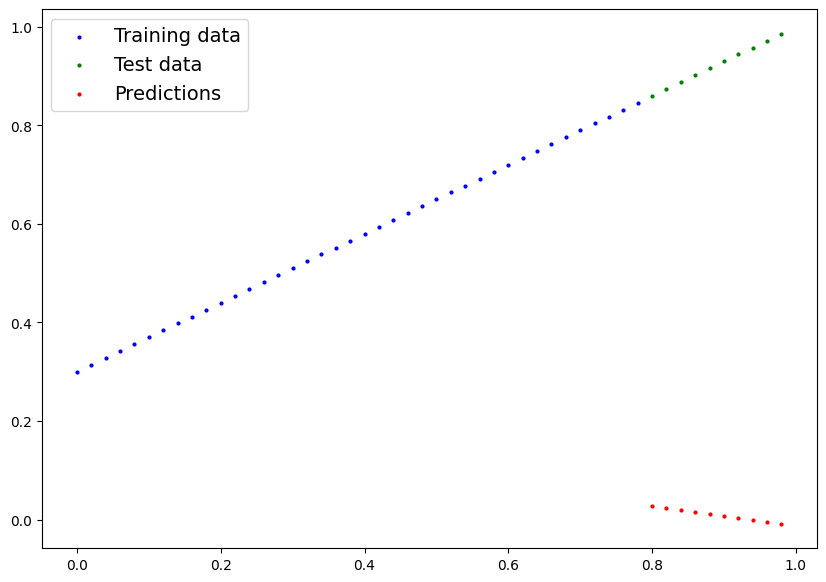

In [60]:
plot_predictions(predictions=y_preds)

In [ ]:
# No wonder it makes non sense because we haven't train it yet! Let's go @*@

## Train our model

In [63]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.2039])), ('bias', tensor([0.1912]))])

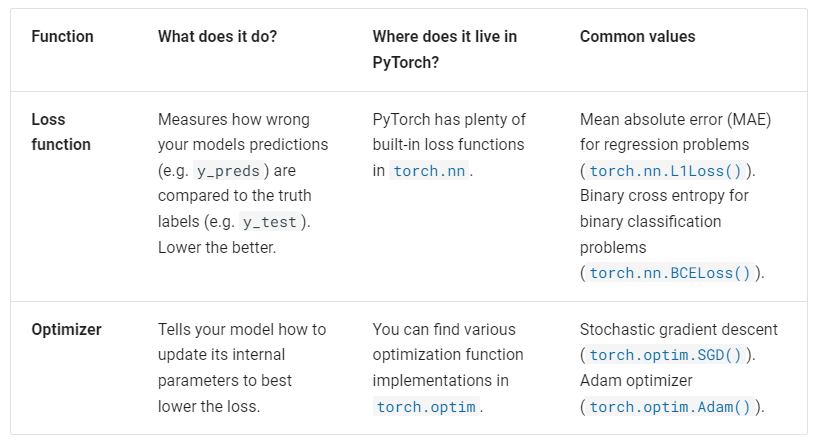

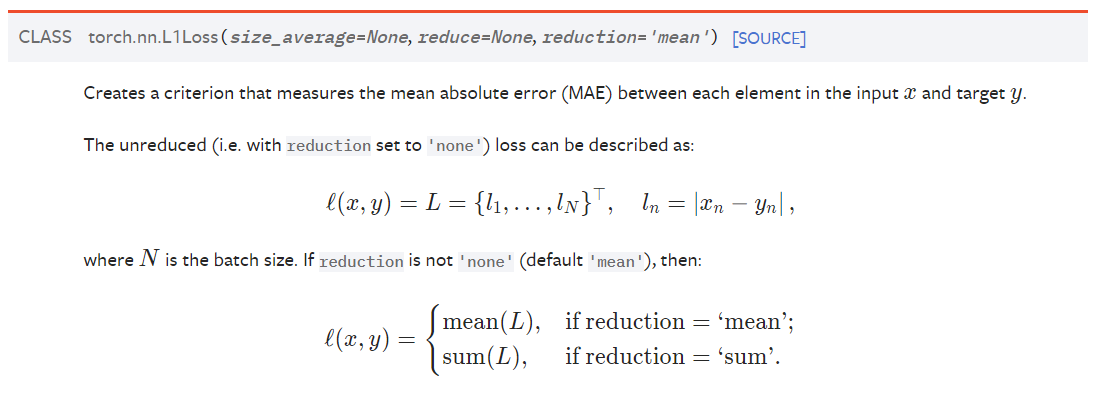

In [66]:
# Setup a loss function
loss_fn = nn.L1Loss()
loss_fn

L1Loss()

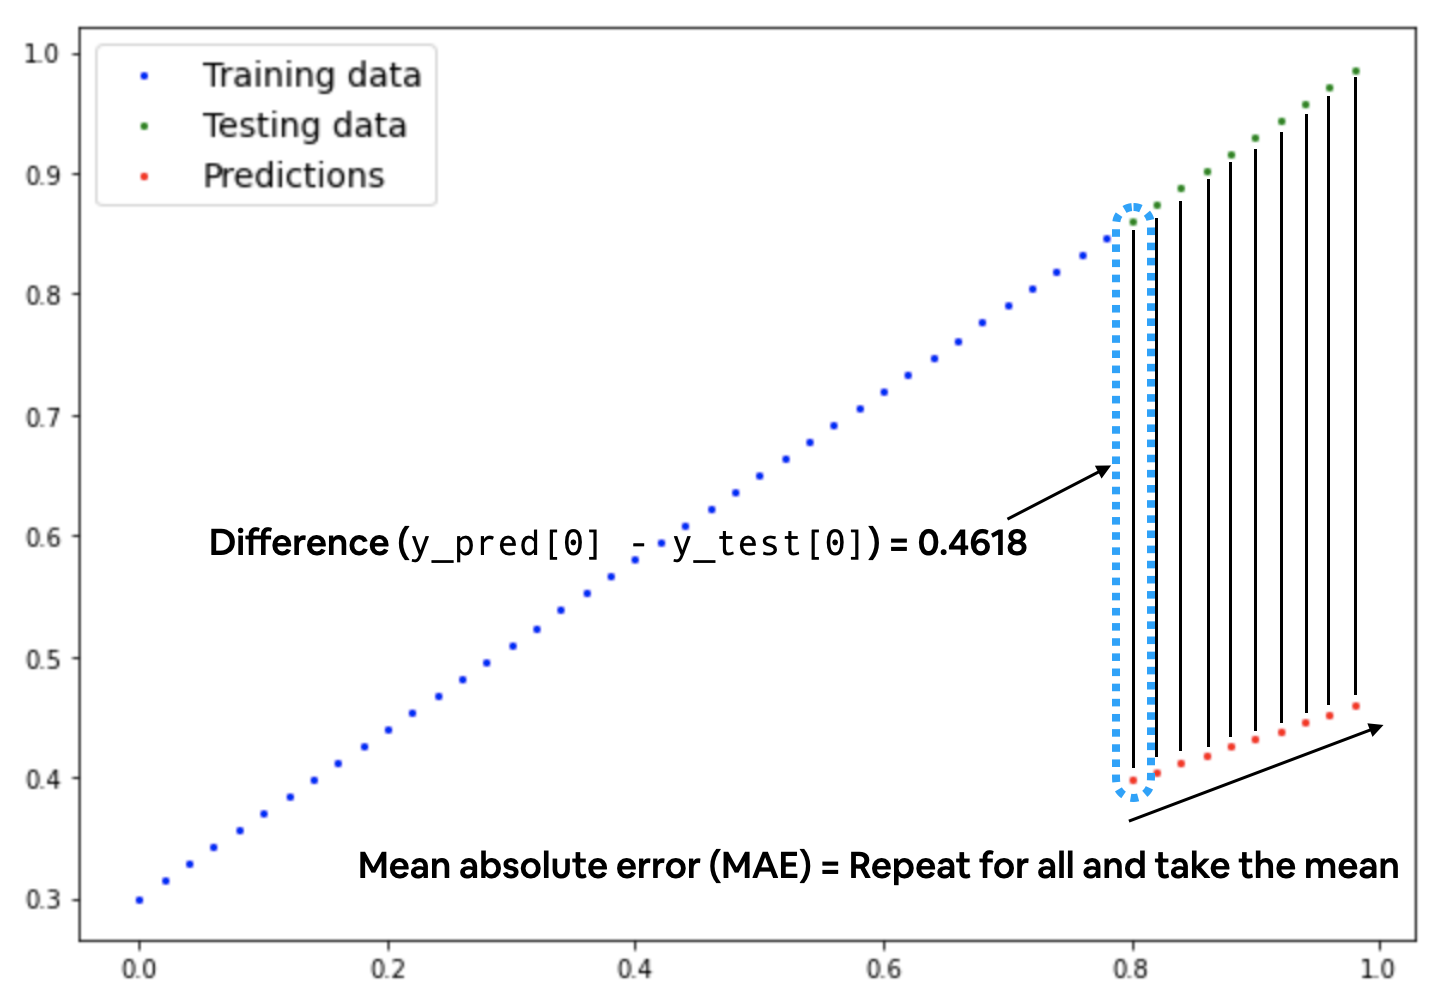

In [69]:
# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1,
                            momentum = 0.9
                            )


In [ ]:
# Create the optimization loop

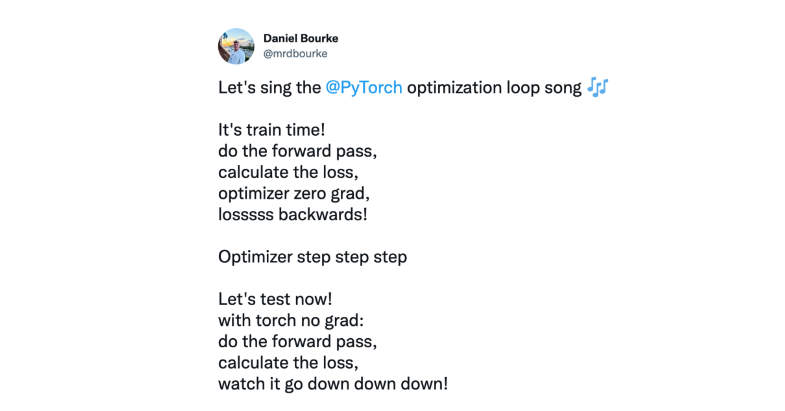

In [67]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.2039], requires_grad=True),
 Parameter containing:
 tensor([0.1912], requires_grad=True)]

In [ ]:
epochs = 1

# An epoch is one loop through all the data
for epoch in range(epochs):
    # Set the model to training mode!
    model_0.train()    # Set all the parameters that require gradients to get access to gradients 

    # 1. Do the forward pass~
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero the gradient (Or we will accumulate the last gradient we calculated)
    optimizer.zero_grad()

    # 4. Perform backpropagation to "get the gradients" with respect to the parameters, which can tell us which direction to go to improve our loss
    loss.backward()

    # 5. Step the optimizer (perform the update "with the gradient we get from BP")
    optimizer.step()

  
    model_0.eval()    # Turns off gradient tracking



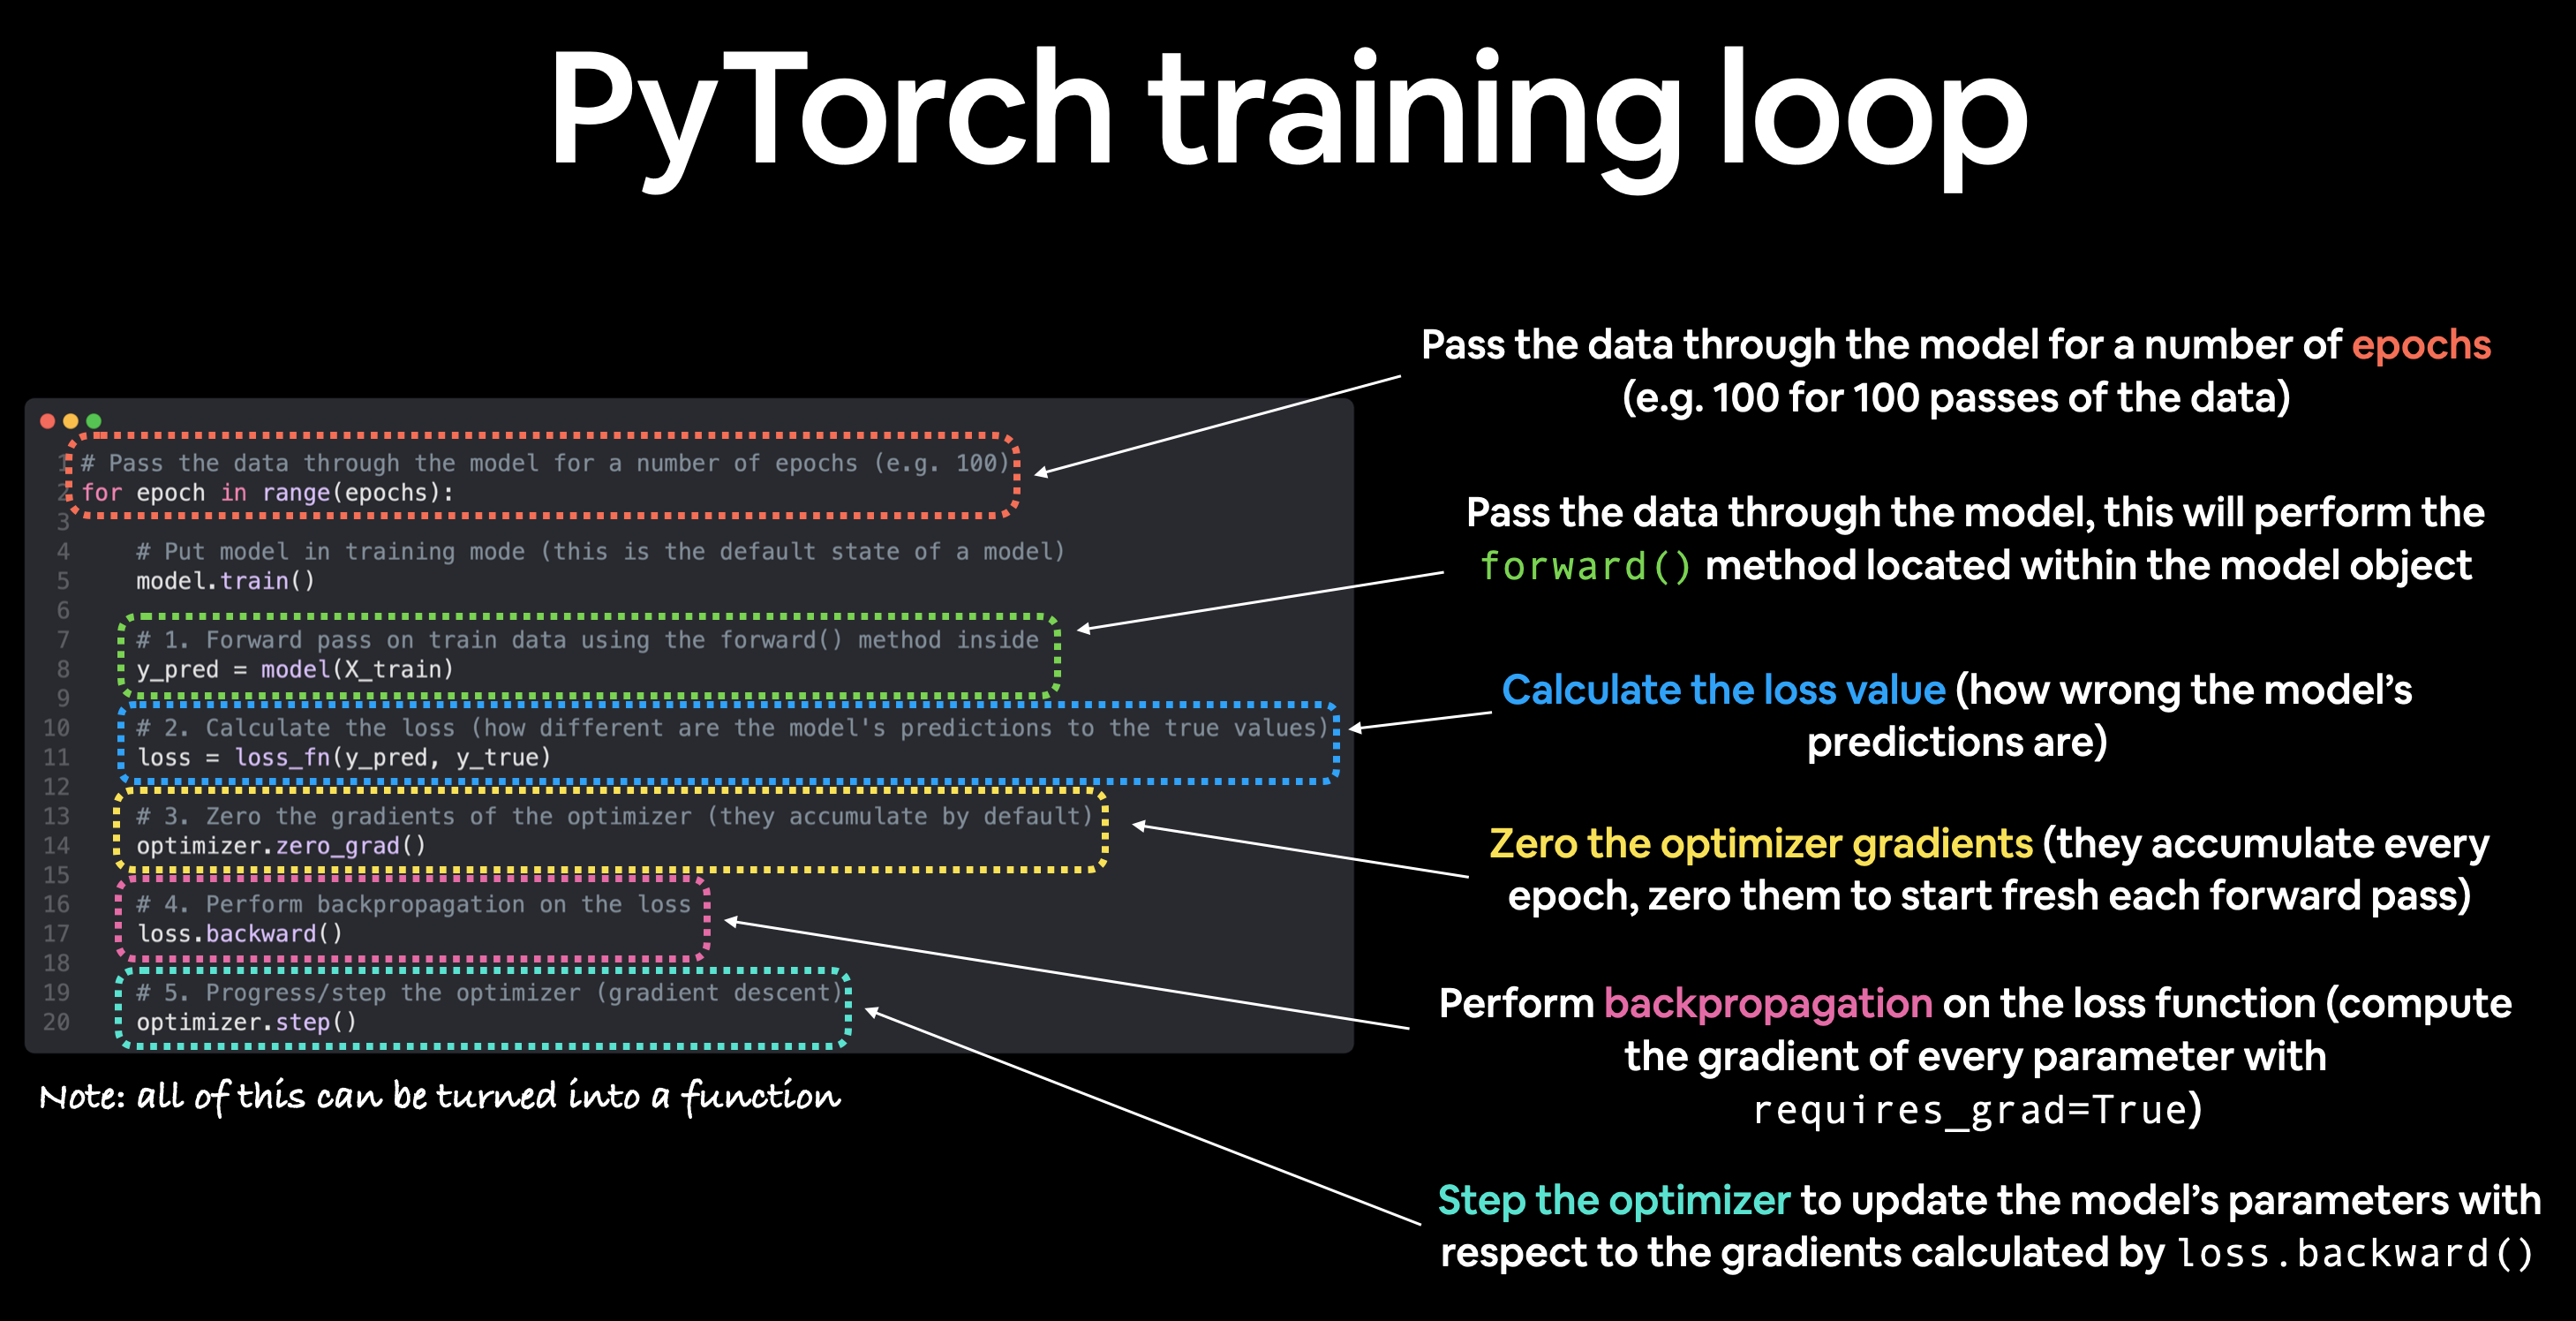

In [ ]:
# Testing part

In [77]:
X_train.shape

torch.Size([40, 1])

In [99]:
epochs = 1

# An epoch is one loop through all the data
for epoch in range(epochs):
    # Set the model to training mode!
    model_0.train()    # Set all the parameters that require gradients to get access to gradients 

    # 1. Do the forward pass~
    y_pred = model_0(X_train)
    # print(f"y_pred = {y_pred}")
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # print(f"y_true = {y_train}")
    print(f"loss = {loss}")

    # 3. Zero the gradient (Or we will accumulate the last gradient we calculated)
    optimizer.zero_grad()

    # 4. Perform backpropagation to "get the gradients" with respect to the parameters, which can tell us which direction to go to improve our loss
    loss.backward()

    # 5. Step the optimizer (perform the update "with the gradient we get from BP")
    optimizer.step()

    #################################################################################################
    model_0.eval()    # Turns off gradient tracking

    print(model_0.state_dict())
    

loss = 0.10092563927173615
OrderedDict([('weights', tensor([0.6495])), ('bias', tensor([0.3384]))])


In [94]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4221])), ('bias', tensor([0.3064]))])

In [81]:
# true weights and bias
weight, bias

(0.7, 0.3)

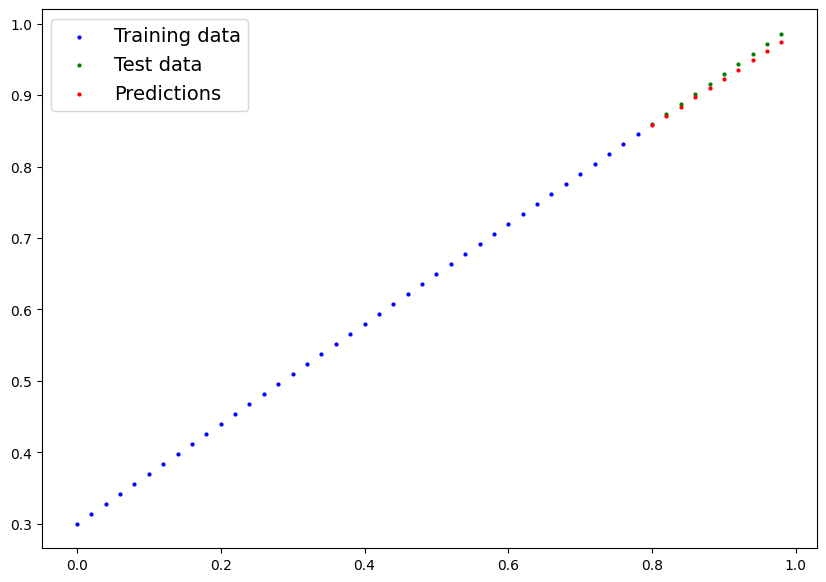

In [100]:
 # Let's see how better are our model now~

with torch.inference_mode():
    y_preds_new = model_0(X_test)

plot_predictions(predictions = y_preds_new)

In [ ]:
# Hoooooray~~~~~